In [44]:
import pandas as pd
import numpy as np

In [2]:
#Loading dataset

df = pd.read_csv("cybersecurity_intrusion_data.csv")

#Preview
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [3]:
# Check the shape
df.shape

(9537, 11)

In [4]:
# See column names
df.columns

Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

In [5]:
# Check for missing values
df.isnull().sum()

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

In [6]:
# Summary statistics
df.describe(include='all')

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
count,9537,9537.000000,9537,9537.000000,9537.000000,7571,9537.000000,9537.000000,9537,9537.000000,9537.000000
unique,9537,NaN,3,NaN,NaN,2,NaN,NaN,5,NaN,NaN
top,SID_00001,NaN,TCP,NaN,NaN,AES,NaN,NaN,Chrome,NaN,NaN
freq,1,NaN,6624,NaN,NaN,4706,NaN,NaN,5137,NaN,NaN
mean,NaN,500.430639,NaN,4.032086,792.745312,NaN,0.331338,1.517773,NaN,0.149942,0.447101
std,NaN,198.379364,NaN,1.963012,786.560144,NaN,0.177175,1.033988,NaN,0.357034,0.497220
min,NaN,64.000000,NaN,1.000000,0.500000,NaN,0.002497,0.000000,NaN,0.000000,0.000000
25%,NaN,365.000000,NaN,3.000000,231.953006,NaN,0.191946,1.000000,NaN,0.000000,0.000000
50%,NaN,499.000000,NaN,4.000000,556.277457,NaN,0.314778,1.000000,NaN,0.000000,0.000000
75%,NaN,635.000000,NaN,5.000000,1105.380602,NaN,0.453388,2.000000,NaN,0.000000,1.000000


In [7]:
# Rename columns to more readble format

df.rename(columns={
    'session_id': 'SessionID',
    'network_packet_size': 'PacketSize',
    'protocol_type': 'Protocol',
    'login_attempts': 'LoginAttempts',
    'session_duration': 'SessionDuration',
    'encryption_used': 'EncryptionUsed',
    'ip_reputation_score': 'IPReputation',
    'failed_logins': 'FailedLogins',
    'browser_type': 'Browser',
    'unusual_time_access': 'UnusualTime',
    'attack_detected': 'AttackDetected'
    
}, inplace=True)

# Confirm the changes
df.columns

Index(['SessionID', 'PacketSize', 'Protocol', 'LoginAttempts',
       'SessionDuration', 'EncryptionUsed', 'IPReputation', 'FailedLogins',
       'Browser', 'UnusualTime', 'AttackDetected'],
      dtype='object')

In [8]:
# EncryptionUsed has 1966 missing values, so changing with "none"

df['EncryptionUsed'].fillna('None', inplace=True)

In [9]:
# SessionID is unique value, so dropping out

df.drop(columns='SessionID', inplace=True)

In [10]:
# Browser has 5 unique Values

df['Browser'].value_counts()

Browser
Chrome     5137
Firefox    1944
Edge       1469
Unknown     502
Safari      485
Name: count, dtype: int64

In [11]:
df['Browser'].value_counts().sum()

9537

In [12]:
# Analyzing AttackDetected Field
# Basic value counts

df['AttackDetected'].value_counts()

AttackDetected
0    5273
1    4264
Name: count, dtype: int64

In [13]:
# Renaming attack detected yes and no
df['AttackDetected'] = df['AttackDetected'].replace({0: 'No', 1: 'Yes'})

In [14]:
# Temporarily convert AttackedDetected back to numeric for correlation
df['AttackDetected_num'] = df['AttackDetected'].map({'No': 0, 'Yes': 1})

In [15]:
# Select relevant numeric features
selected_cols = ['PacketSize', 'LoginAttempts', 'SessionDuration', 'IPReputation', 'FailedLogins', 
                 'UnusualTime', 'AttackDetected_num']
corr = df[selected_cols].corr()

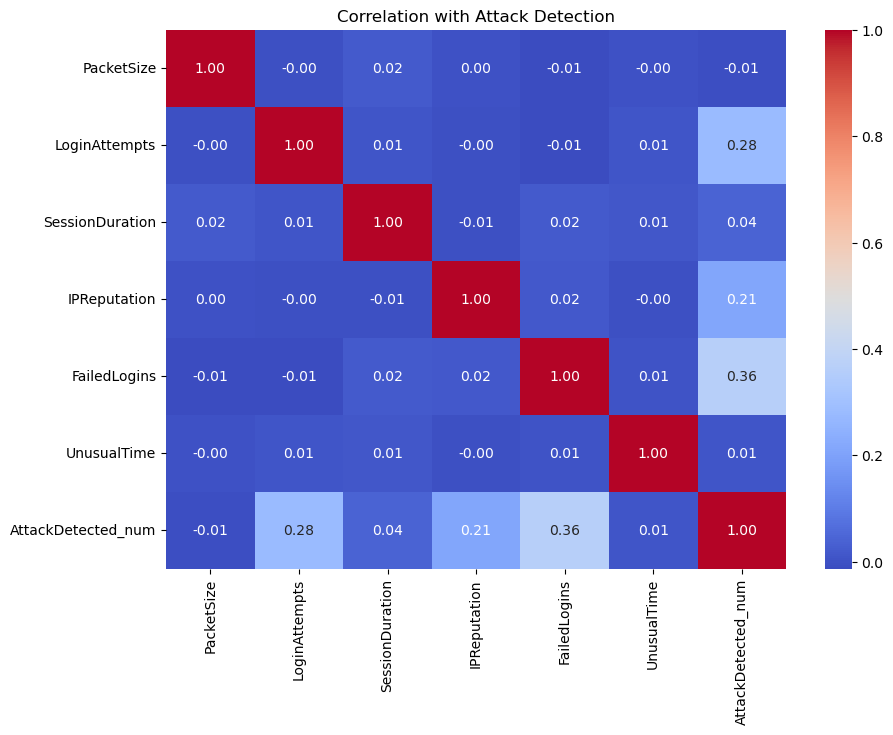

In [16]:
# visualize Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation with Attack Detection")
plt.show()

In [34]:
# FailedLogins-strongest-sessions with more failed login attempts are highly associated with attacks. Then
# following LoginAttempts and IPReputation

In [36]:
# Building a custom Risk Score

df['RiskScore'] = (
    df['FailedLogins'] * 2 +
    df['LoginAttempts'] * 1.5 +
    df['IPReputation'] * 10
)

In [50]:
# Classify Risk Levels

df['RiskLevel'] = pd.cut(df['RiskScore'],
                         bins=[0, 20, 40, np.inf],
                         labels=['Low', 'Medium', 'High'])

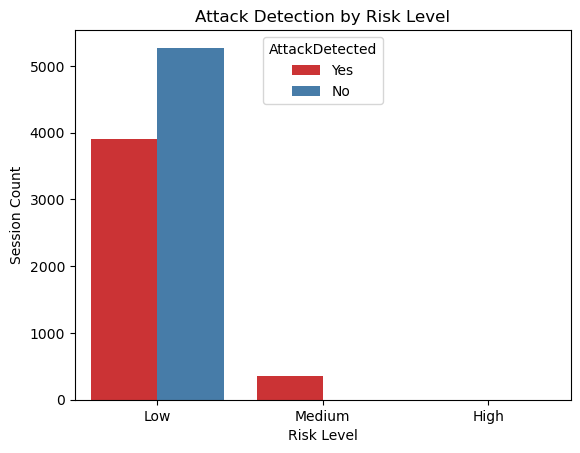

In [52]:
# Visualize Risk vs. Attack

sns.countplot(data=df, x='RiskLevel', hue='AttackDetected', palette='Set1')
plt.title('Attack Detection by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Session Count')
plt.show()

In [54]:
df['RiskScore'].describe()

count    9537.000000
mean       12.397054
std         4.001050
min         1.690624
25%         9.586072
50%        12.218848
75%        15.045451
max        30.626930
Name: RiskScore, dtype: float64

In [56]:
# Calculate quantile-based bins

df['RiskLeve'] = pd.qcut(df['RiskScore'], q=3, labels=['Low', 'Medium', 'High'])

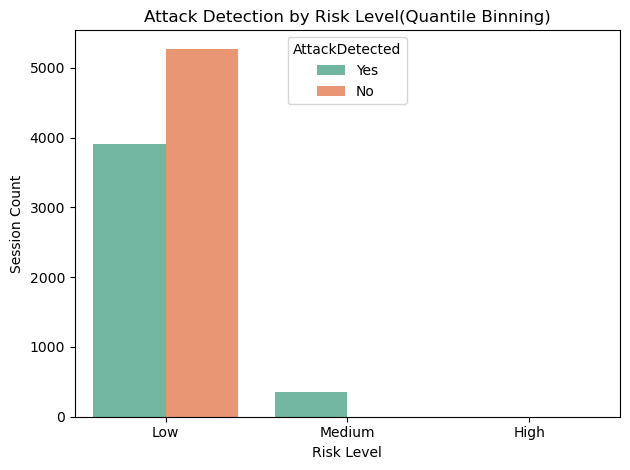

In [58]:
# Re-Plot

sns.countplot(data=df, x='RiskLevel', hue='AttackDetected', palette='Set2')
plt.title('Attack Detection by Risk Level(Quantile Binning)')
plt.xlabel('Risk Level')
plt.ylabel('Session Count')
plt.tight_layout()
plt.show()

In [60]:
df['RiskLevel'] = pd.qcut(df['RiskScore'], q=2, labels=['Low','High'])

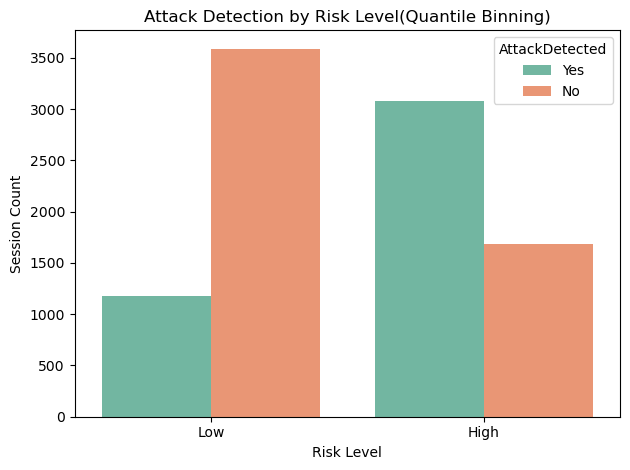

In [62]:
sns.countplot(data=df, x='RiskLevel', hue='AttackDetected', palette='Set2')
plt.title('Attack Detection by Risk Level(Quantile Binning)')
plt.xlabel('Risk Level')
plt.ylabel('Session Count')
plt.tight_layout()
plt.show()

In [64]:
# FEATURE BEHAVIOR COMPARISON

#using groupby() - this will show how much bigger/lower the averages are for sessions flagged as attacks.

df.groupby('AttackDetected')[['LoginAttempts', 'FailedLogins', 'IPReputation', 'SessionDuration', 'PacketSize']].mean().round(2)

,LoginAttempts,FailedLogins,IPReputation,SessionDuration,PacketSize
AttackDetected,,,,,
No,3.54,1.18,0.30,763.32,501.64
Yes,4.64,1.94,0.37,829.13,498.93


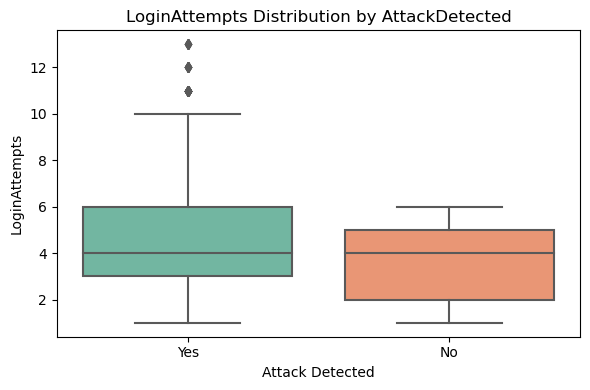

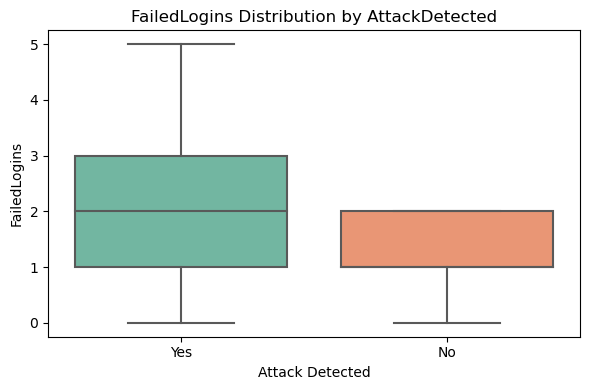

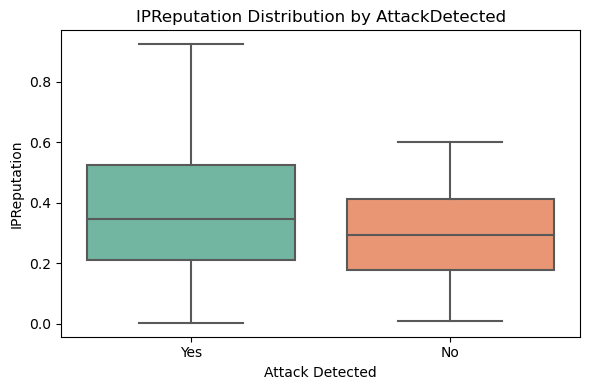

In [70]:
# Visualizing Boxplots for distribution

features = ['LoginAttempts', 'FailedLogins', 'IPReputation']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='AttackDetected', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} Distribution by AttackDetected')
    plt.xlabel('Attack Detected')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

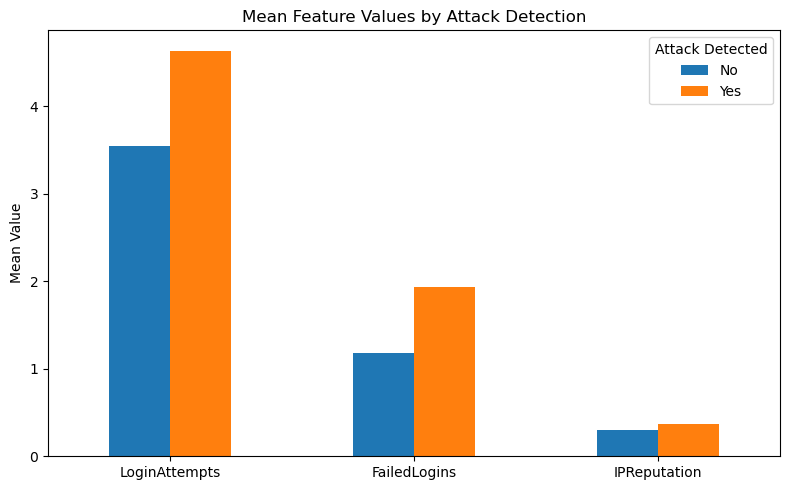

In [74]:
# Bar Plot mean comparison

feature_means = df.groupby('AttackDetected')[features].mean().T
feature_means.plot(kind='bar', figsize=(8,5), rot=0)
plt.title('Mean Feature Values by Attack Detection')
plt.ylabel('Mean Value')
plt.legend(title='Attack Detected')
plt.tight_layout()
plt.show()

In [ ]:
### Feature Behavior Comparison - Attack vs. Non-Attack Sessions
# BY analyzing how feature values change between attack and non attack sessions we found:

# LoginAttempts: Higher on average in attack sessions, with a wider spread and notable outliers
# FailedLogins: Significantly higher in attack sessions, suggesting brute-force or credential-stuffing behavior.
# IPReputation: Attacks are associated with higher (worse) reputation scores.
